In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plat
import palettable as pal
import matplotlib as mpl
import numpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
special_flowers = ['MMETSP0693', 'MMETSP1019', 'MMETSP0923', 'MMETSP0008', 'MMETSP1002', 'MMETSP1325', 'MMETSP1018', 
                   'MMETSP1346', 'MMETSP0088', 'MMETSP0092', 'MMETSP0717', 'MMETSP0223', 'MMETSP0115', 'MMETSP0196', 
                   'MMETSP0197', 'MMETSP0398', 'MMETSP0399', 'MMETSP0922']

In [3]:
giant_matrix = "../assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv"
all_metrics = pd.read_csv(giant_matrix)
# transrate score metrics
all_metrics = all_metrics[~all_metrics['SampleName'].isin(special_flowers)]
ncgr_cds_transrate_score = all_metrics[['SampleName', 'score.y']]
ncgr_nt_transrate_score = all_metrics[['SampleName','score.x']]
dib_transrate_score = all_metrics[['SampleName','score']]
ncgr_nt_transrate_score.columns = ['SampleName','score']
ncgr_cds_transrate_score.columns = ['SampleName','score']
#transrate reference metrics
ncgr_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB.y','n_seqs.x','mean_orf_percent.x']]
dib_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']]
ncgr_transrate_nt.columns = ['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']
ncgr_cds_transrate_score = ncgr_cds_transrate_score.dropna()
ncgr_nt_transrate_score = ncgr_nt_transrate_score.dropna()
dib_transrate_score = dib_transrate_score.dropna()

In [4]:
# Calculates differences between transrate scores
# DIB - NCGR
# Negative values when NCGR higher score
# Positive values when DIB higher score
ncgr_tmp = ncgr_nt_transrate_score.set_index("SampleName")
dib_tmp = dib_transrate_score.set_index("SampleName")
diff_tmp = dib_tmp - ncgr_tmp

In [5]:
phyl_data = all_metrics[['SampleName', 'Phylum']]
phyl_data = phyl_data.set_index("SampleName")
diff_tmp = diff_tmp.join(phyl_data)

Bacillariophyta
Dinophyta
Ochrophyta
Haptophyta
Ciliophora
Chlorophyta
Cryptophyta


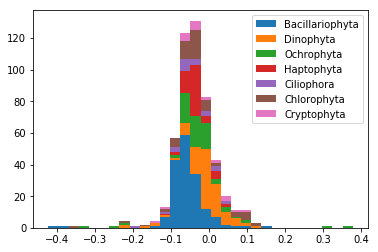

In [20]:
keep = ["Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta"]
hist_val = []
for k in keep:
    print(k)
    df = diff_tmp.loc[diff_tmp['Phylum'] == k]
    new = df[['score']].dropna().values
    hist_val.append(new)
plt.figure()
plt.hist(hist_val, bins=30, stacked=True)
plt.legend(keep)
savefig('../paper/transrate_score_nt_v_dib_diff_histogram_stacked.png',dpi=680, bbox_inches="tight")
savefig('../paper/transrate_score_nt_v_dib_diff_histogram_stacked.pdf',dpi=680, bbox_inches="tight")
plt.show()

In [ ]:
ax = diff_tmp.plot(kind='hist', bins=30,legend=False,color='#018E42')
ax.set_xlabel("Difference between transrate scores",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis= 'both',labelsize='x-large')
ax.tick_params(axis='x', which='both', top='off')

In [12]:
s = numpy.std(diff_tmp)
print(s)

score    0.0623
dtype: float64


In [39]:
m = numpy.mean(diff_tmp)
print(m)

score   -0.03447
dtype: float64


In [79]:
x = diff_tmp[diff_tmp.score.abs() > diff_tmp.score.quantile(0.95)]

In [80]:
x.shape

(180, 2)

In [82]:
x = x[x['Phylum'].isin(keep)]

In [83]:
x.shape

(150, 2)

In [84]:
pos = x[x['score'] > 0]
neg = x[x['score'] < 0]

In [85]:
pos.shape

(26, 2)

In [86]:
neg.shape

(124, 2)

In [87]:
pos.groupby(['Phylum']).size()

Phylum
Bacillariophyta     3
Chlorophyta        10
Cryptophyta         1
Dinophyta           8
Ochrophyta          4
dtype: int64

In [88]:
neg.groupby(['Phylum']).size()

Phylum
Bacillariophyta    74
Chlorophyta        15
Ciliophora          7
Cryptophyta         5
Dinophyta           8
Haptophyta          5
Ochrophyta         10
dtype: int64

In [33]:
#a = diff_tmp[diff_tmp['Phylum'].isin(keep)]
#print(a.head())
print(diff_tmp[diff_tmp['Phylum'].isin(keep)].groupby(['Phylum']).size())

Phylum
Bacillariophyta    173
Chlorophyta         61
Ciliophora          25
Cryptophyta         22
Dinophyta          113
Haptophyta          61
Ochrophyta          73
dtype: int64


In [ ]:
labels = keep
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()